# Imports

In [1]:
## General
import pandas as pd
import numpy as np
import csv
import ruptures as rpt

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Path & Source Links

In [2]:
root_path = '../'
data_path = 'Data/'
################## CO2  #########################
# [SOURCE : https://climate.nasa.gov/vital-signs/carbon-dioxide/]

CO2_DATAPATH = root_path+data_path+'co2_mm_mlo.csv'
#################################################


############# Temperature Anomaly  ###############
# [SOURCE : https://climate.nasa.gov/vital-signs/global-temperature/]

GTEMP_DATAPATH = root_path+data_path+'Temperature Anomaly.csv'
#################################################



################## Arctic Sea Ice  ###############
# [SOURCE : https://climate.nasa.gov/vital-signs/arctic-sea-ice/]

ARCTICICE_DATAPATH = root_path+data_path+'Arctic Sea Ice.csv'
#################################################


################## Antarctica Mass  ###############
# [SOURCE : https://climate.nasa.gov/vital-signs/Antarctica Mass.csv/]

ANTARCTICAMASS_DATAPATH = root_path+data_path+'Antarctica Mass.csv'
#################################################


################## Sea Height Variation  ###############
# [SOURCE : https://climate.nasa.gov/vital-signs/sea-level/]

SEALEVEL_DATAPATH = root_path+data_path+'Sea Level.csv'
#################################################


################## Ocean Temperature  ###############
# [SOURCE : https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature]

OCEANTEMP_DATAPATH = root_path+data_path+'Ocean Temperature.csv'
#################################################


################## Ocean Pollution  ###############
# [SOURCE : https://ourworldindata.org/plastic-pollution#how-much-plastic-enters-the-world-s-oceans]

OCEANPOL_DATAPATH = root_path+data_path+'macroplastics-in-ocean.csv'
#################################################


################## Ocean acidity  ###############
# [SOURCE : http://data.europa.eu/euodp/data/dataset/RM1c8FG68KQV03qWG5tPw/resource/1ad964a6-3933-475e-a056-de18f1a78eb1]

OCEANACIDITY_DATAPATH = root_path+data_path+'Ocean pH Levels.csv'
#################################################


################## Ozone Area  ###############
# [SOURCE : https://ourworldindata.org/ozone-layer]

OZONEAREA_DATAPATH = root_path+data_path+'antarctic-ozone-hole-area.csv'
#################################################

# Load & Prepare the Data

In [3]:
CO2_DATA = pd.read_csv(CO2_DATAPATH,sep='\t', index_col=0)
CO2_DATA = CO2_DATA[CO2_DATA.index >= 1990]
CO2_DATA = CO2_DATA[CO2_DATA.index <= 2018]
CO2_DATA = CO2_DATA.groupby(CO2_DATA.index).mean()
CO2_DATA.index = pd.to_datetime(CO2_DATA.index, format='%Y')
CO2_DATA['avg_lower'] = CO2_DATA.average * 0.99
CO2_DATA['avg_upper'] = CO2_DATA.average * 1.01
CO2_DATA.shape

(29, 8)

In [4]:
GTEMP_DATA = pd.read_csv(GTEMP_DATAPATH, index_col=0)
GTEMP_DATA.index = pd.to_datetime(GTEMP_DATA.index, format="%Y")
GTEMP_DATA = GTEMP_DATA[GTEMP_DATA.index >= '1990']
GTEMP_DATA = GTEMP_DATA[GTEMP_DATA.index <= '2018']
GTEMP_DATA['No_Smoothing_lower'] = GTEMP_DATA.No_Smoothing * 0.95
GTEMP_DATA['No_Smoothing_upper'] = GTEMP_DATA.No_Smoothing * 1.05
GTEMP_DATA['year'] = [e.year for e in GTEMP_DATA.index]
prevVal = GTEMP_DATA['No_Smoothing'].values[0]
prevYr = GTEMP_DATA['year'].values[0]-1
for i, d in enumerate(GTEMP_DATA[['No_Smoothing', 'year']].iterrows()):
    k,v = d
    GTEMP_DATA.loc[k, 'Slope'] = (v['No_Smoothing'] - prevVal) / (v['year'] - prevYr)
    prevVal = v['No_Smoothing']
    prevYr = v['year']
GTEMP_DATA.shape
GTEMP_DATA['Change Point'] = GTEMP_DATA.Slope >( GTEMP_DATA.Slope.mean()*10)

In [5]:
ARCTICICE_DATA = pd.read_csv(ARCTICICE_DATAPATH, index_col=0)
ARCTICICE_DATA.index = pd.to_datetime(ARCTICICE_DATA.index, format="%Y")
ARCTICICE_DATA = ARCTICICE_DATA[ARCTICICE_DATA.index >= '1990']
ARCTICICE_DATA = ARCTICICE_DATA[ARCTICICE_DATA.index <= '2018']
ARCTICICE_DATA.shape

(29, 5)

In [6]:
SEALEVEL_DATA = pd.read_csv(SEALEVEL_DATAPATH, index_col=0)
SEALEVEL_DATA.index = np.floor(SEALEVEL_DATA.year)
SEALEVEL_DATA = SEALEVEL_DATA[['coi']]
SEALEVEL_DATA = SEALEVEL_DATA[['coi']] - SEALEVEL_DATA.iloc[0,0]
SEALEVEL_DATA.index = pd.to_datetime(SEALEVEL_DATA.index, format="%Y")
SEALEVEL_DATA = SEALEVEL_DATA.groupby(SEALEVEL_DATA.index).mean()
SEALEVEL_DATA = SEALEVEL_DATA[SEALEVEL_DATA.index >= '1990']
SEALEVEL_DATA = SEALEVEL_DATA[SEALEVEL_DATA.index <= '2018']
SEALEVEL_DATA.shape

(26, 1)

In [7]:
OCEANTEMP_DATA = pd.read_csv(OCEANTEMP_DATAPATH, index_col=0).dropna()
OCEANTEMP_DATA.index = pd.to_datetime(OCEANTEMP_DATA.index.astype(int), format="%Y")
OCEANTEMP_DATA = OCEANTEMP_DATA[OCEANTEMP_DATA.index >= '1990']
OCEANTEMP_DATA = OCEANTEMP_DATA[OCEANTEMP_DATA.index <= '2018']
OCEANTEMP_DATA.shape

(26, 3)

In [8]:
OCEANPOL_DATA = pd.read_csv(OCEANPOL_DATAPATH).dropna(axis=1)
OCEANPOL_DATA = OCEANPOL_DATA[OCEANPOL_DATA.Year >= 1990]
OCEANPOL_DATA = OCEANPOL_DATA.set_index(['Entity', 'Year']).unstack().T.droplevel(0)
OCEANPOL_DATA.index = pd.to_datetime(OCEANPOL_DATA.index, format='%Y')
OCEANPOL_DATA.shape

(61, 3)

In [9]:
OCEANACIDITY_DATA = pd.read_csv(OCEANACIDITY_DATAPATH, index_col=0).dropna(axis=1)
OCEANACIDITY_DATA.index = pd.to_datetime(OCEANACIDITY_DATA.index, format='%Y')
OCEANACIDITY_DATA.sort_index(inplace = True)
OCEANACIDITY_DATA.shape

(16, 1)

In [10]:
OZONEAREA_DATA = pd.read_csv(OZONEAREA_DATAPATH, index_col=0).dropna(axis=1)
OZONEAREA_DATA.index = pd.to_datetime(OZONEAREA_DATA.Year, format='%Y')
OZONEAREA_DATA = pd.DataFrame(OZONEAREA_DATA.iloc[:,-1])
OZONEAREA_DATA = OZONEAREA_DATA[OZONEAREA_DATA.index >= '1990']
OZONEAREA_DATA.shape

(27, 1)

In [12]:

ANTARCTICAMASS_DATA = pd.read_csv(ANTARCTICAMASS_DATAPATH, index_col=0).dropna(axis=1)
ANTARCTICAMASS_DATA.index = ANTARCTICAMASS_DATA.apply(lambda x : int(np.floor(x.name)), axis=1)
ANTARCTICAMASS_DATA = ANTARCTICAMASS_DATA.groupby(ANTARCTICAMASS_DATA.index).mean()
ANTARCTICAMASS_DATA.index = pd.to_datetime(ANTARCTICAMASS_DATA.index, format='%Y')
ANTARCTICAMASS_DATA.shape

(16, 2)

# Prepare Graph

## C02 & Global Temp

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


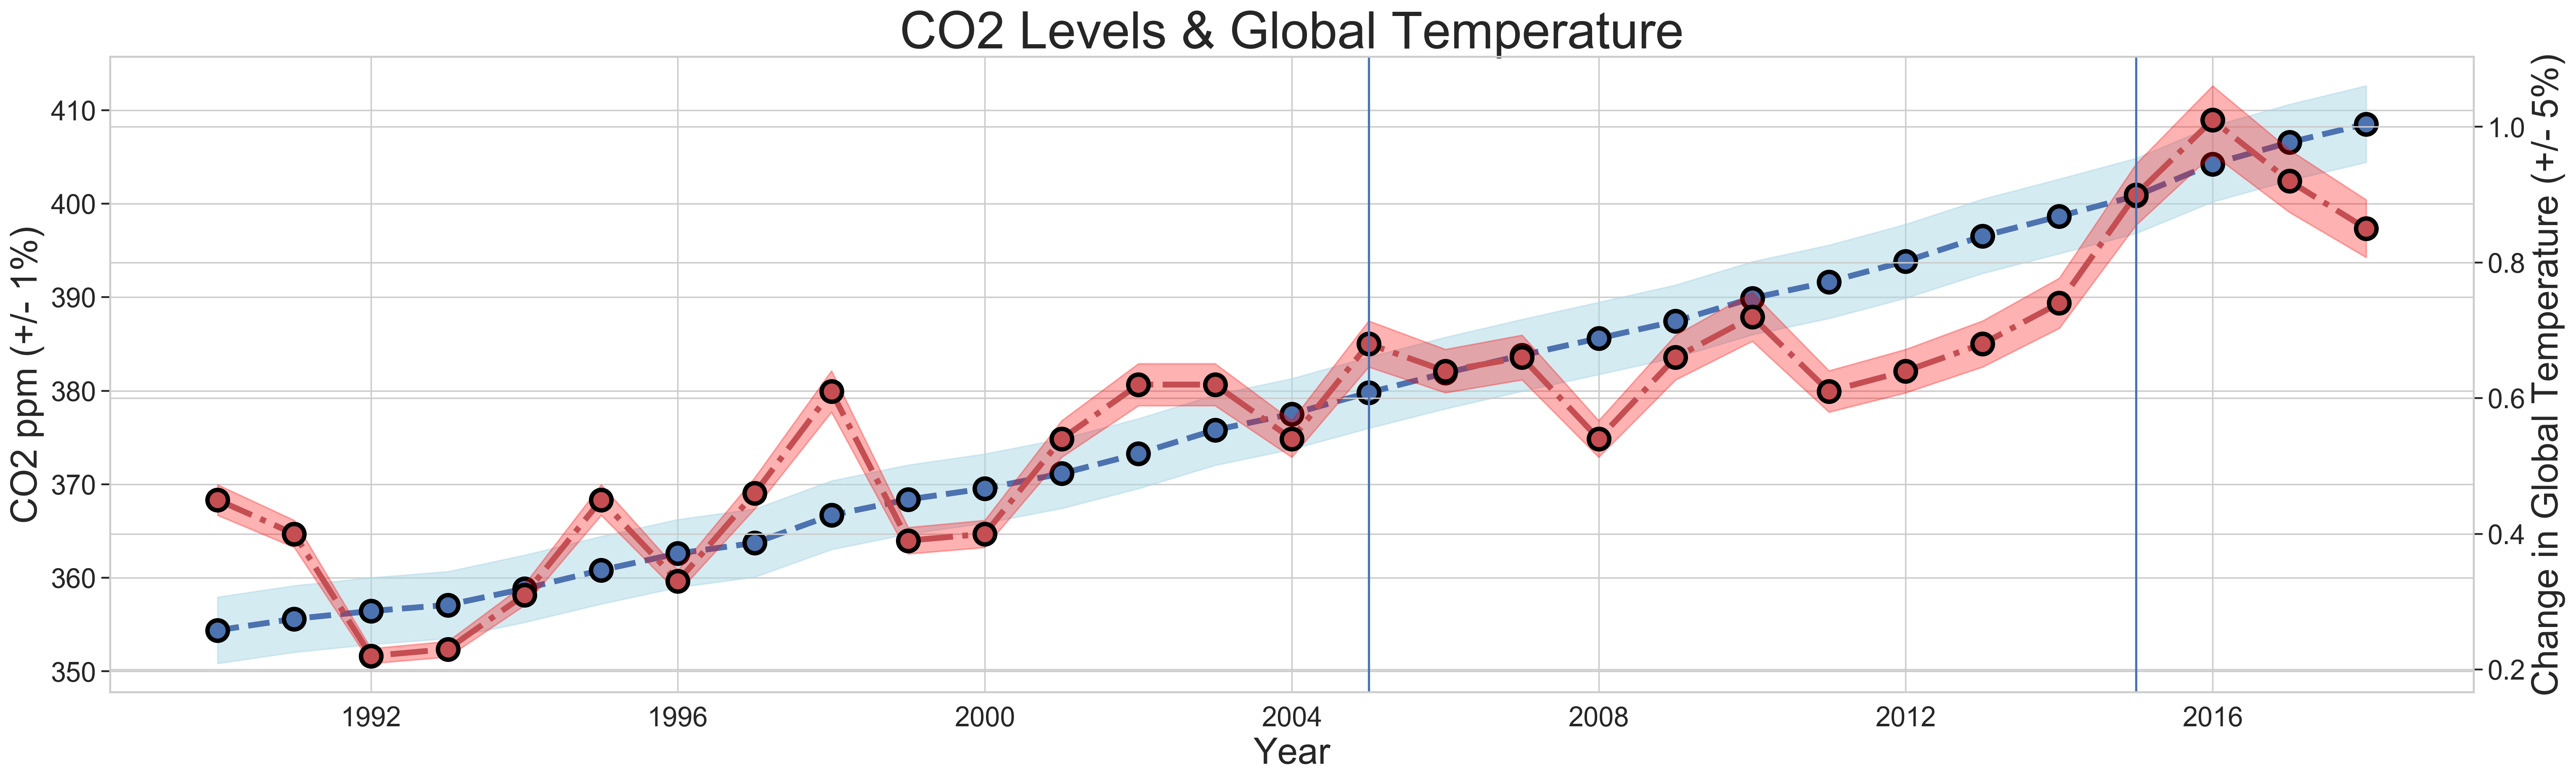

In [13]:
# CO2_DATA
sns.set()
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (29,8)
sns.set(style='whitegrid', font_scale = 1.7)

fig = sns.lineplot(x = 'year', y = 'average', data=CO2_DATA.reset_index().copy(),
                   marker='o', markersize = 14, markeredgecolor = 'black', markeredgewidth = 3,
                   linewidth = 4,
                   ci = 'sd', err_style = "band")

fig.set_title('CO2 Levels & Global Temperature', fontsize = 35)
fig.set_xlabel('Year', fontsize = 25)
fig.set_ylabel('CO2 ppm (+/- 1%)', fontsize = 25)
fig.tick_params(axis='both', which='minor', labelsize=22)
fig.lines[0].set_linestyle("--")
fig = plt.fill_between(CO2_DATA.reset_index().year, 
                 CO2_DATA.avg_lower, 
                 CO2_DATA.avg_upper,
                 color='lightblue', alpha='0.5')

# GTEMP_DATA
ax2 = plt.twinx()
fig = sns.lineplot(x = 'Year', y = 'No_Smoothing', data=GTEMP_DATA.reset_index().copy(),
                   marker='o', markersize = 14, markeredgecolor = 'black', markeredgewidth = 3,
                   linewidth = 4, color = 'r',
                   ci = 'sd', err_style = "band", ax = ax2)
fig.set_ylabel('Change in Global Temperature (+/- 5%)', fontsize = 25)
fig.tick_params(axis='both', which='minor', labelsize=22)
fig.lines[0].set_linestyle("-.")
fig = plt.fill_between(GTEMP_DATA.reset_index().Year, 
                 GTEMP_DATA.No_Smoothing_lower, 
                 GTEMP_DATA.No_Smoothing_upper,
                 color='red', alpha='0.3')
fig.axes.axvline(x='2015') # Change Point
fig.axes.axvline(x='2005') # Change Point

fig.figure.savefig("../Plots & GIF's/top.png")


## Koala Habitat

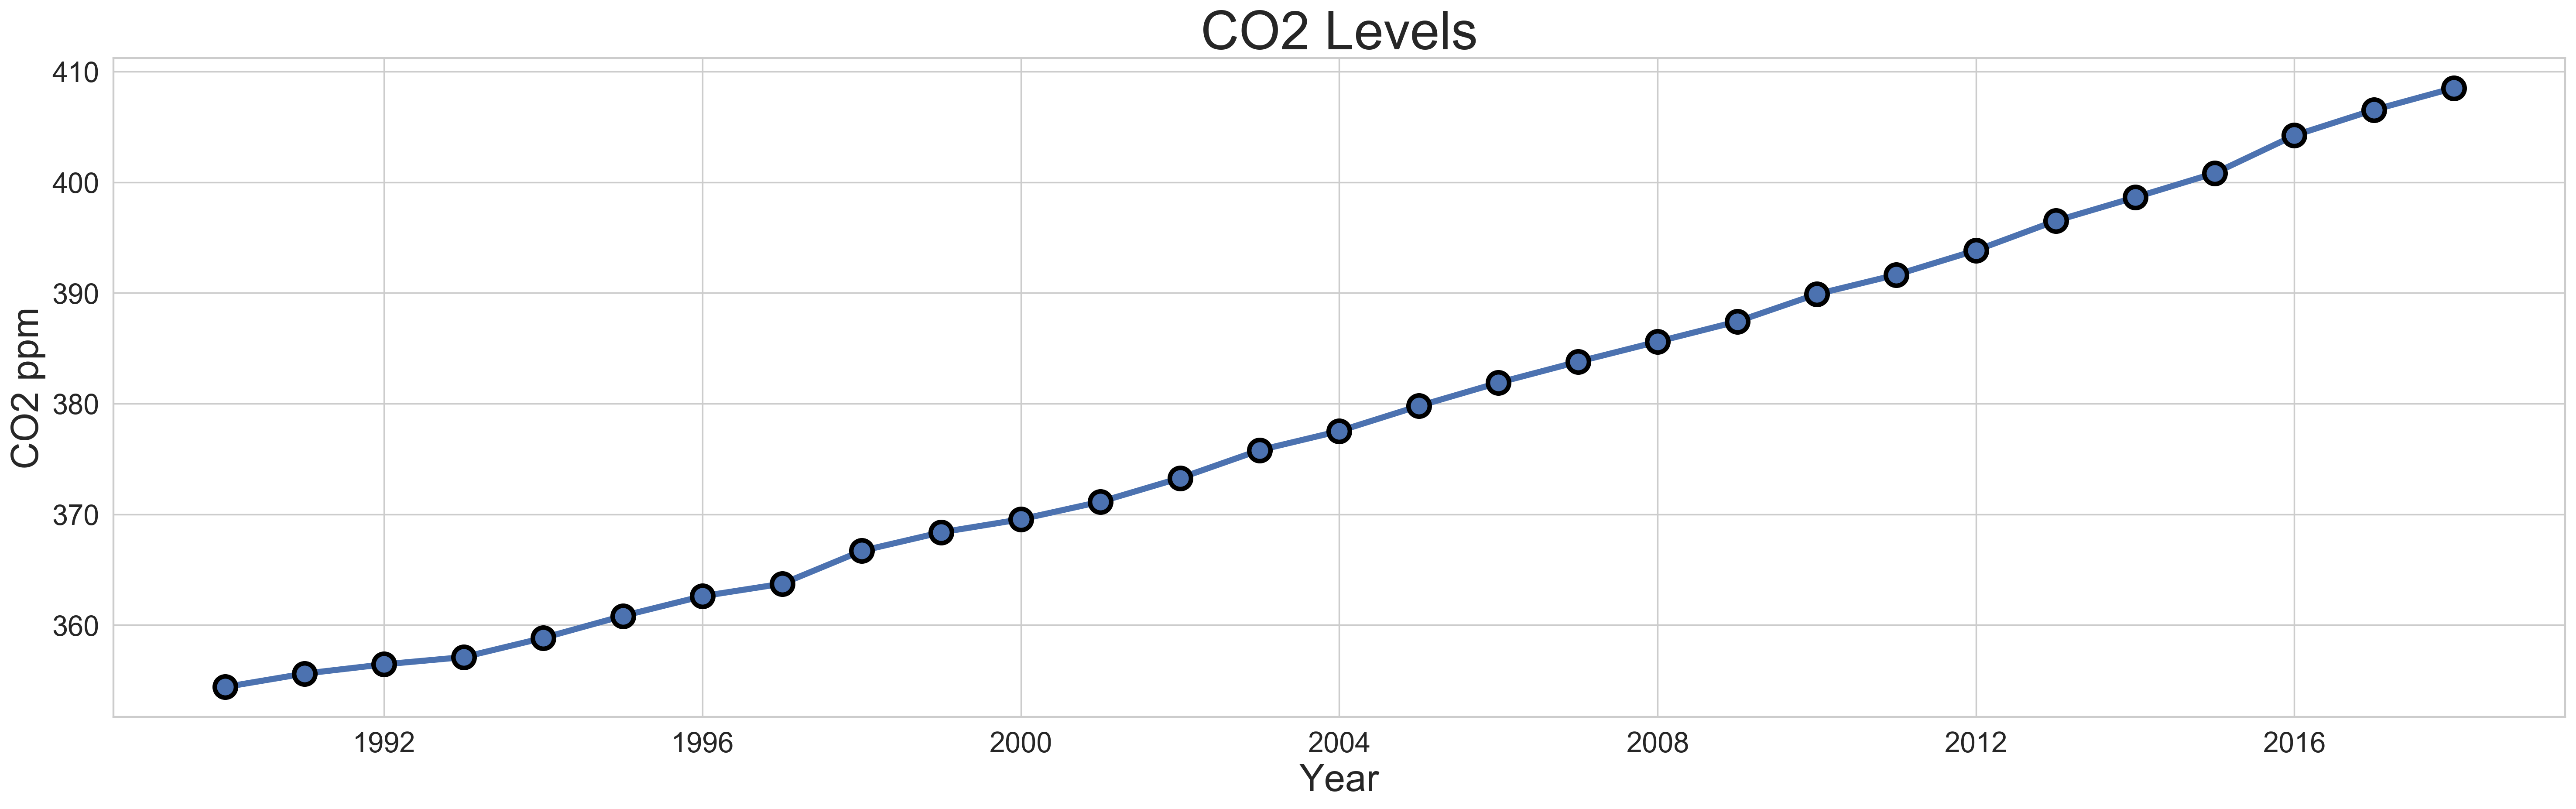

In [14]:
fig = sns.lineplot(x = 'year', y = 'average', data= CO2_DATA.reset_index().copy(),
                   marker='o', markersize = 14, markeredgecolor = 'black', markeredgewidth = 3,
                   linewidth = 4,
                   ci = 'sd', err_style = "band")

fig.set_title('CO2 Levels', fontsize = 35)
fig.set_xlabel('Year', fontsize = 25)
fig.set_ylabel('CO2 ppm', fontsize = 25)
fig.tick_params(axis='both', which='minor', labelsize=22)
fig.figure.savefig("../Plots & GIF's/koala.png")

## Sea Turtle

In [15]:
ST_DATA = pd.DataFrame(index = pd.date_range(start='1990-01-01', end = '2018-01-01', freq = 'YS'))
ST_DATA['Ocean Pollution'] = pd.DataFrame(OCEANPOL_DATA[OCEANPOL_DATA.index <= '2018'].iloc[:,1])
ST_DATA = pd.merge(ST_DATA, SEALEVEL_DATA['coi'], right_index=True, left_index=True, how='outer')
ST_DATA.rename(columns={'Annual anomaly':'Change in Ocean Temperature', 'coi' : 'Change in Sea Level'}, inplace = True)
ST_DATA.fillna(0, inplace = True)

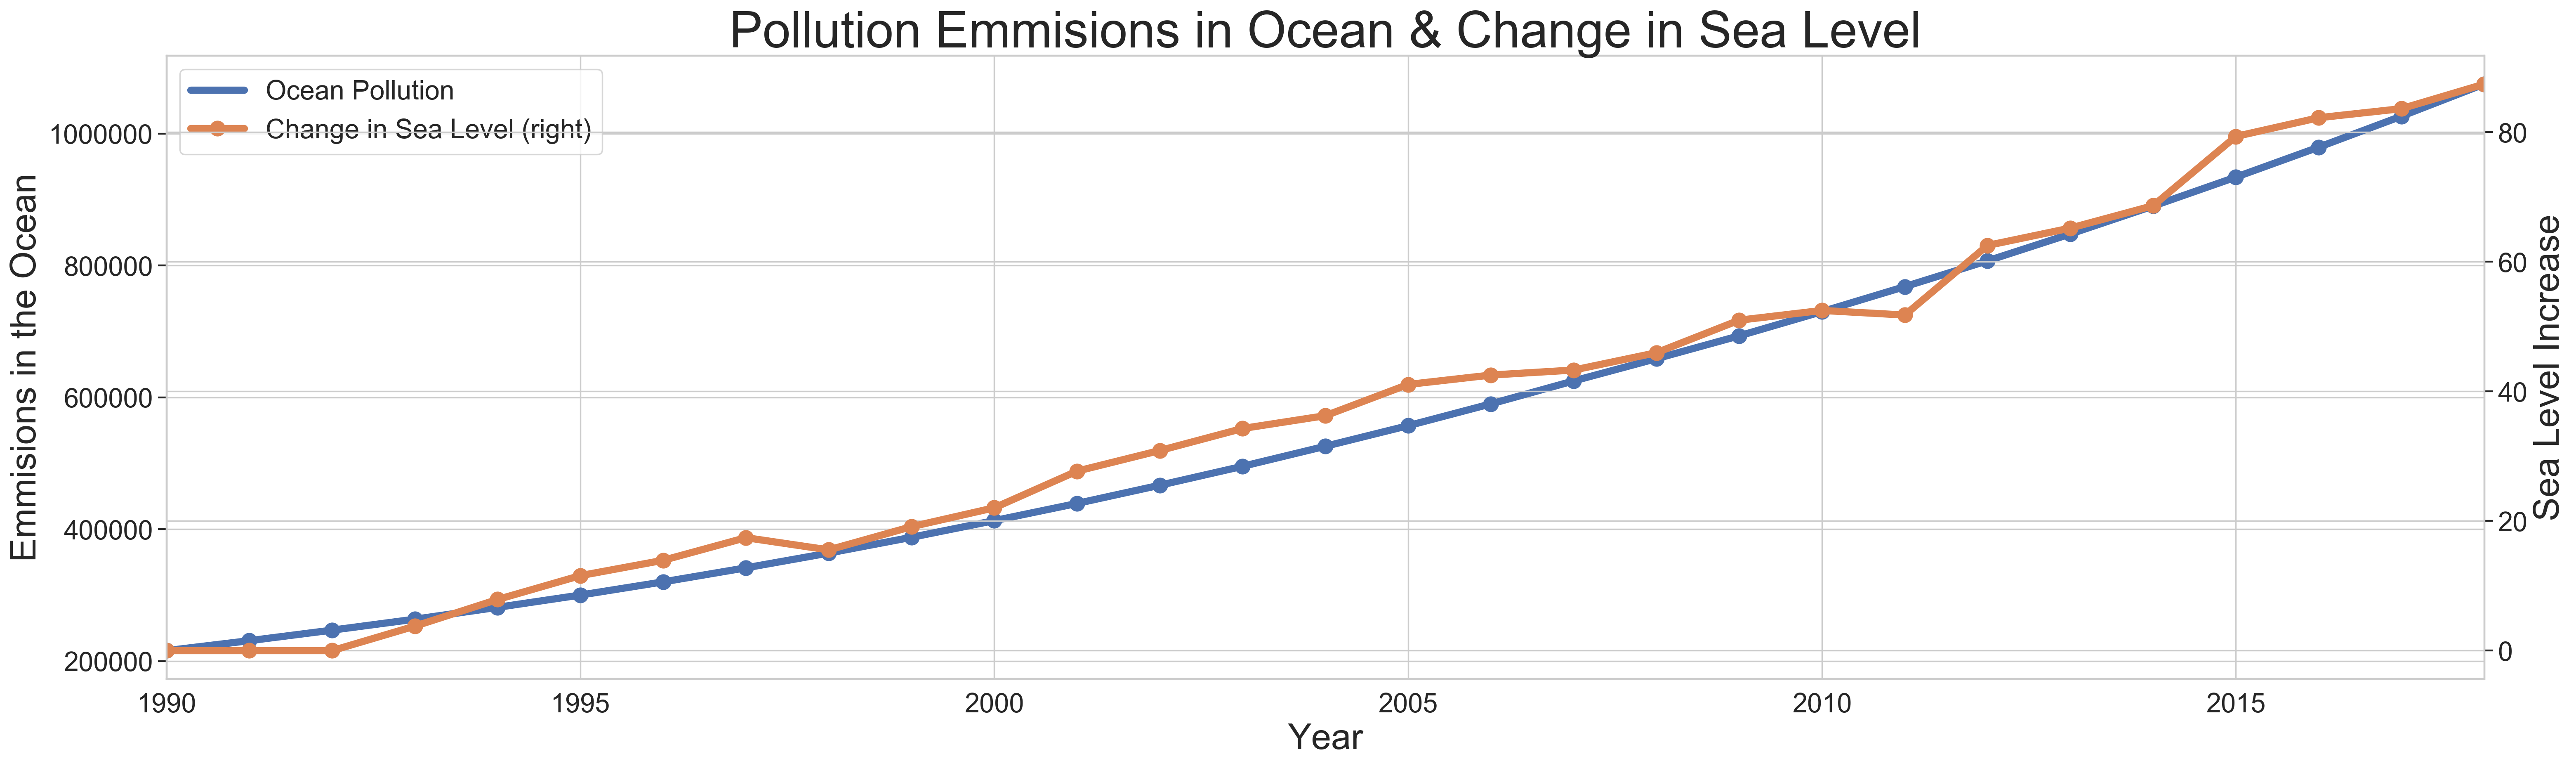

In [16]:
ST_DATA.iloc[:,0].plot(legend = True,
                       marker= 'o', markersize = 10, 
                       linewidth = 5, grid='both')
plt.ylabel('Emmisions in the Ocean', fontsize = 25)
plt.xlabel('Year', fontsize = 25)
ST_DATA.iloc[:,1].plot(secondary_y = True,legend = True, grid='both',
                       marker= 'o', markersize = 10, 
                       linewidth = 5)
plt.ylabel('Sea Level Increase', fontsize = 25)
_ = plt.title('Pollution Emmisions in Ocean & Change in Sea Level', fontsize = 35)
plt.savefig("../Plots & GIF's/sea turtle.png")

## Antarctica Whales

In [17]:
AW_DATA = pd.DataFrame(index = pd.date_range(start='1990-01-01', end = '2018-01-01', freq = 'YS'))
AW_DATA['Antarctica Mass Decline'] = pd.DataFrame(ANTARCTICAMASS_DATA.iloc[:,0])
AW_DATA = pd.merge(AW_DATA, OCEANACIDITY_DATA['pH'], right_index=True, left_index=True, how='outer')
AW_DATA.rename(columns={'pH' : 'Ocean pH Level'}, inplace = True)
AW_DATA = AW_DATA[AW_DATA.index >= '2000']
# AW_DATA.fillna(0, inplace = True)

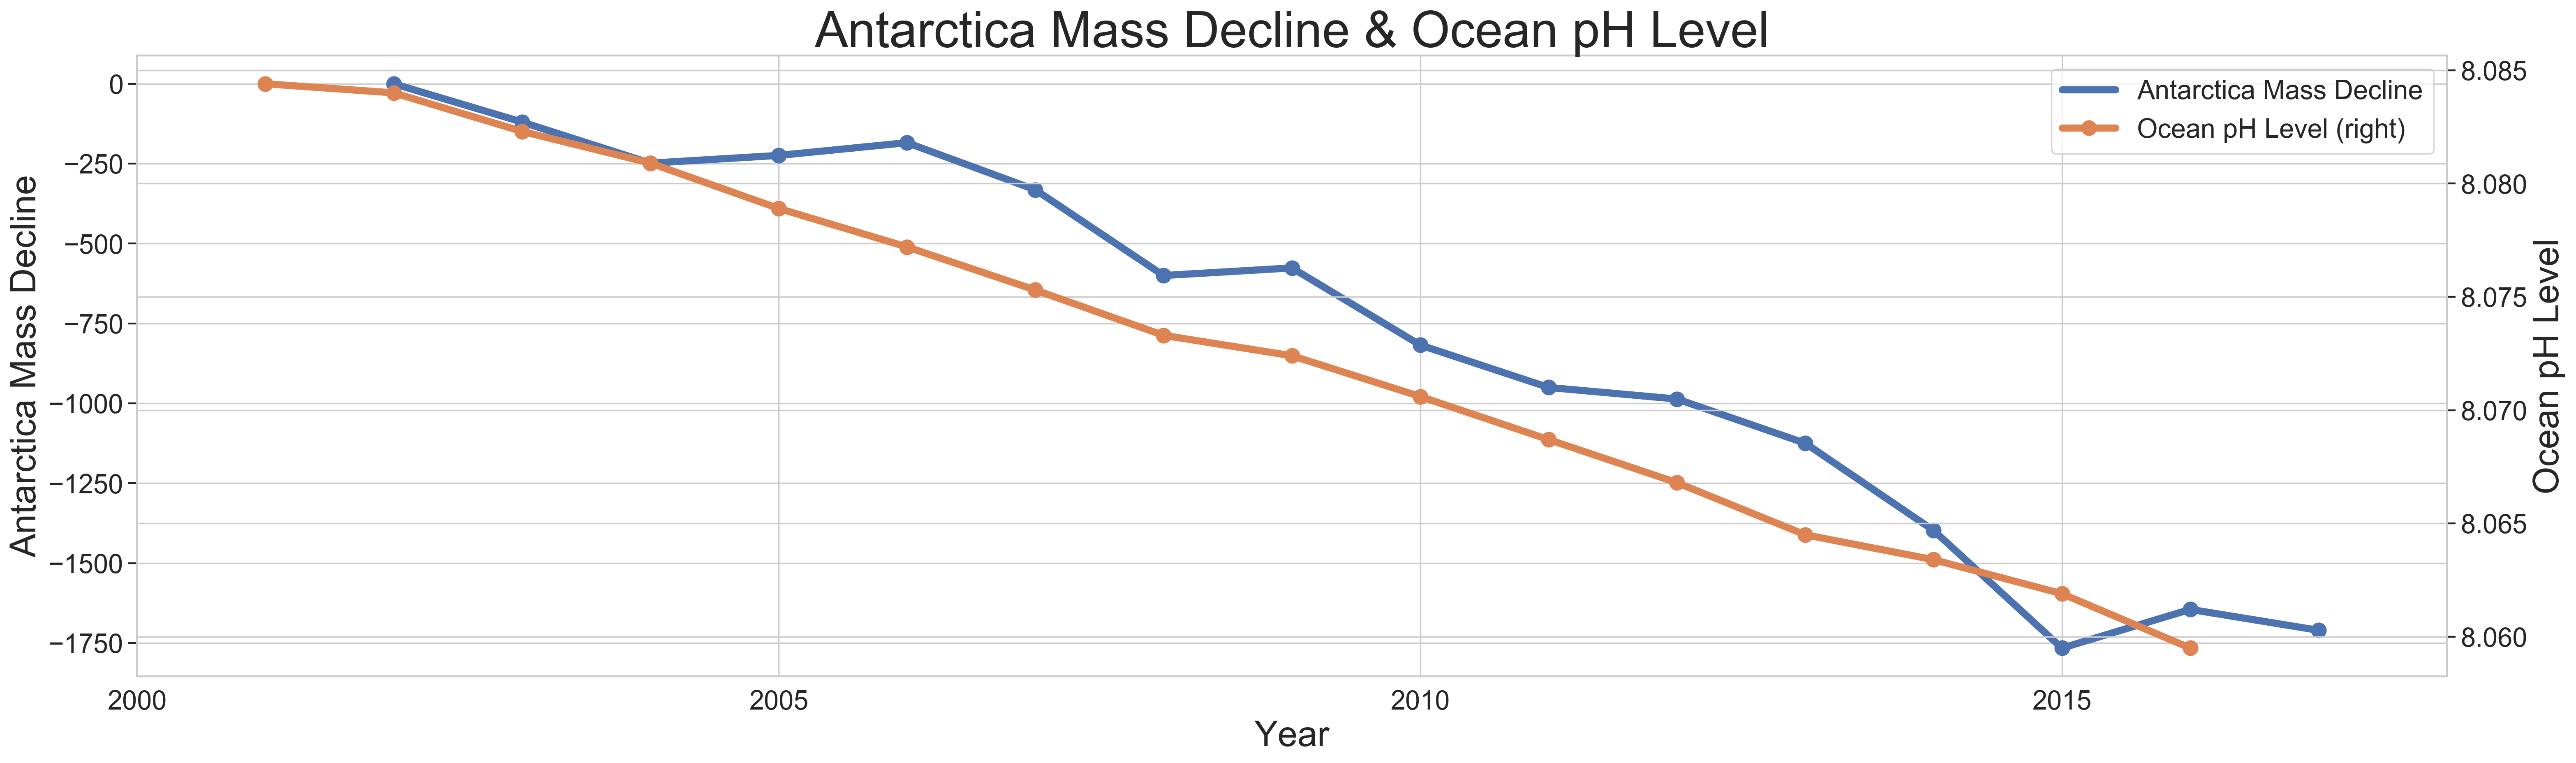

In [18]:
AW_DATA.iloc[:,0].plot(legend = True,
                       marker= 'o', markersize = 10, 
                       linewidth = 5, grid='both')
plt.ylabel('Antarctica Mass Decline', fontsize = 25)
plt.xlabel('Year', fontsize = 25)
AW_DATA.iloc[:,1].plot(secondary_y = True,legend = True, grid='both',
                       marker= 'o', markersize = 10, 
                       linewidth = 5)
plt.ylabel('Ocean pH Level', fontsize = 25)
_ = plt.title('Antarctica Mass Decline & Ocean pH Level', fontsize = 35)
plt.savefig("../Plots & GIF's/blue whale.png")


## IUCN List

In [100]:
IUCN_DATA = pd.read_csv(root_path+data_path+'/all.csv',
                        usecols=['Red List status',
                                 'Year assessed'])
IUCN_DATA['Red List status'].replace({'LR/lc' : 'LR', 'LR/nt' : 'LR'}, inplace = True)

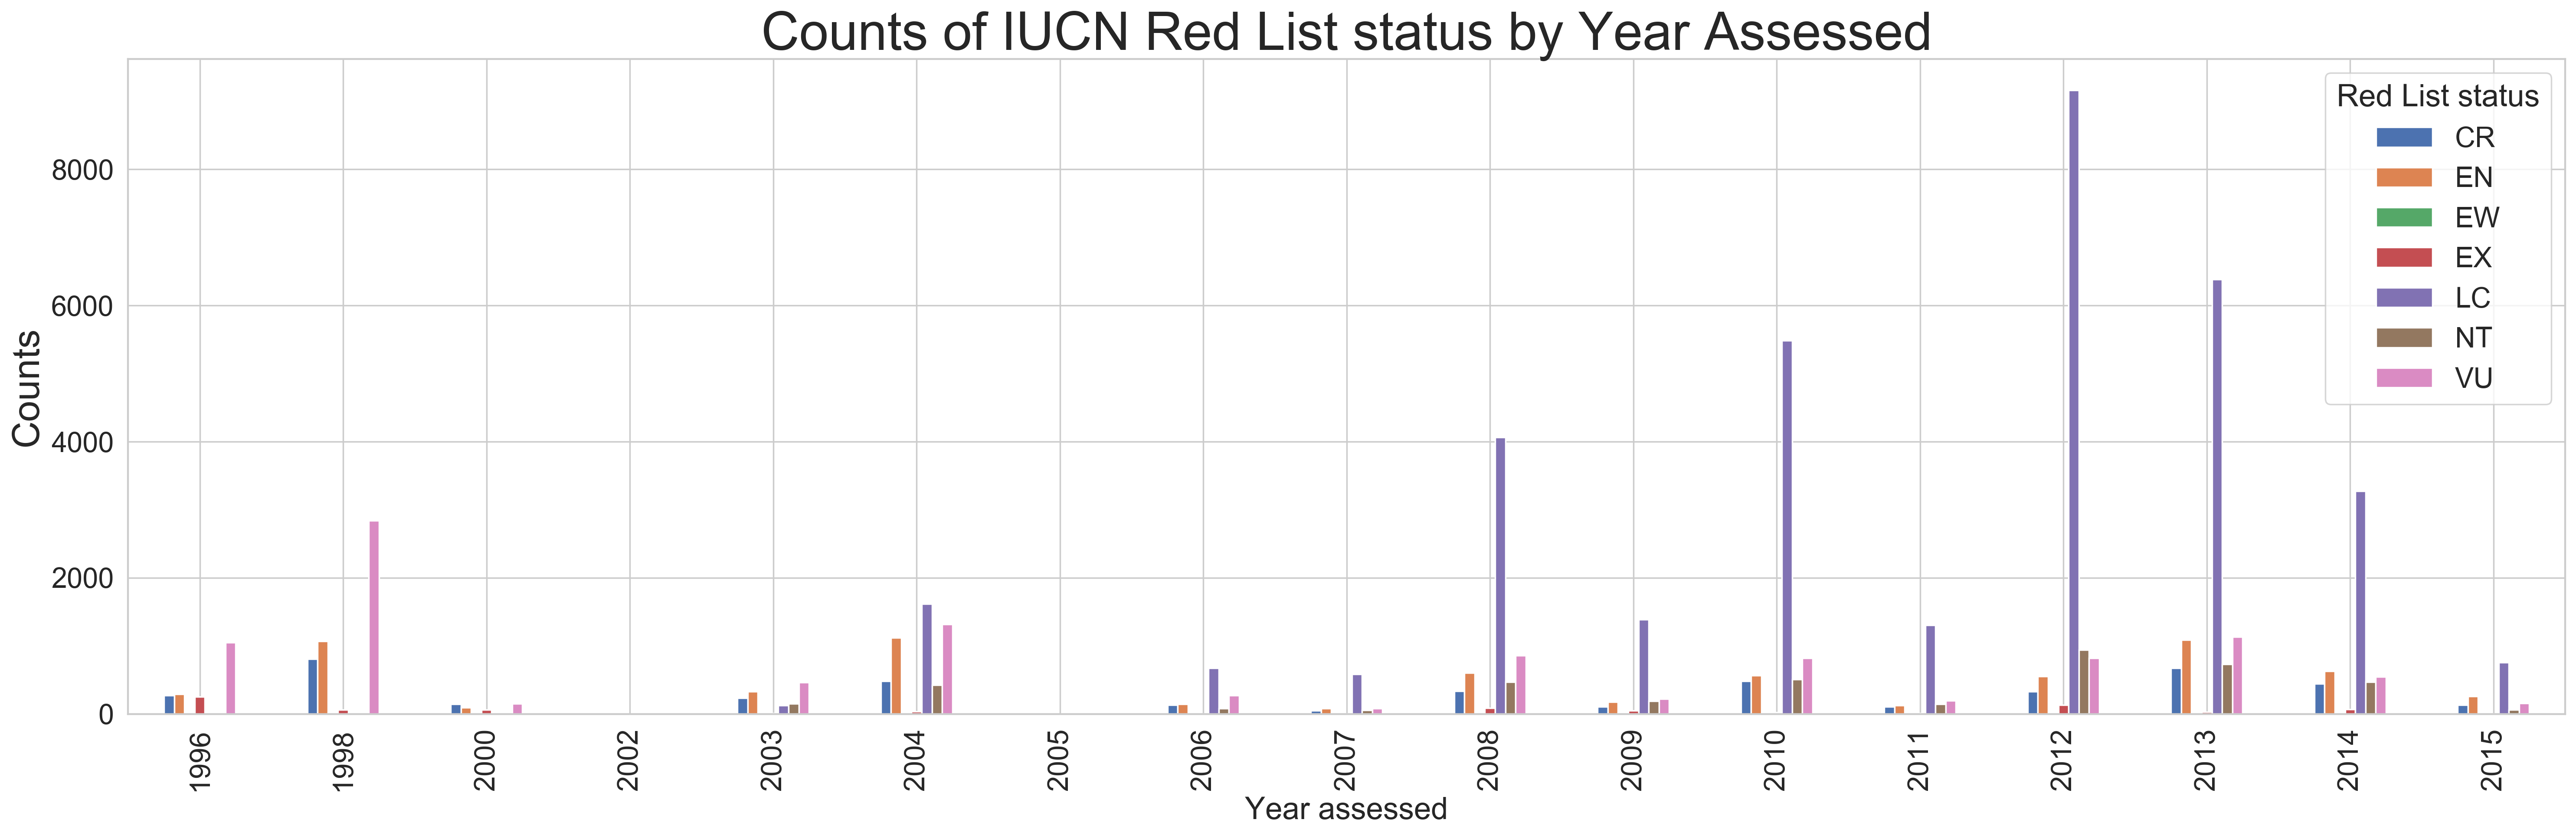

In [101]:
IUCN_DATA = IUCN_DATA.groupby(['Year assessed'])['Red List status'].value_counts().unstack()
IUCN_DATA = IUCN_DATA.drop(['LR'], axis=1)
IUCN_DATA.plot(kind='bar')
plt.rcParams['figure.dpi'] =250
plt.title('Counts of IUCN Red List status by Year Assessed', fontsize=35)
plt.ylabel('Counts', fontsize = 25)
plt.savefig("../Plots & GIF's/iucn status.png")

In [109]:
t = IUCN_DATA.stack().reset_index()
t.rename(columns = {0:'Counts'}, inplace = True)
t.to_csv(root_path+data_path+'IUCN_DATA_melt.csv')